In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pheli\OneDrive\Documentos


In [4]:
dados = pd.read_csv('DOM2015.csv')

In [5]:
dados1 = dados[((dados.UF<=35) & (dados.UF>= 31)) & ((dados.V0220 > 0) | (dados.V02272 > 0) | ((dados.V02273 == 1)| (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Sudeste & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)

In [6]:
dados2 = dados1[["UF","V0220","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]

In [7]:
dados2 = dados2.dropna(how='any')

In [8]:
dados3 = dados2

In [9]:
def MelhorTV(df):
    if (df["V02272"] == 1.0): return 3
    elif(df["V02274"] == 1.0): return 2
    elif(df["V02273"] == 1.0): return 1
    else: return 0
    
def MelhorNET(df):
    if (df["V02425"] == 2): return 3
    elif(df["V02424"] == 2): return 2
    elif(df["V02426"] == 2): return 1
    else: return 0

In [10]:
TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET

In [11]:
dados4 = dados2[["UF","V4622"]]
dados4["TV"] = dados3["TV"]
dados4["NET"] = dados3["NET"]

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [46]:
ut1 = pd.crosstab(dados4.TV,dados4.NET,normalize="index")

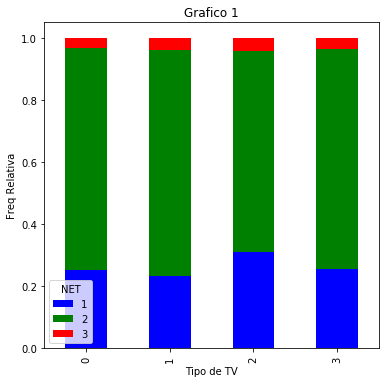

In [59]:
plot = ut1.plot(kind='bar',title='Grafico 1',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')

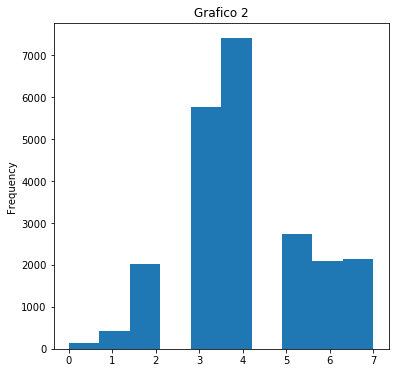

In [67]:
ddados3 = dados3[(dados3.V4622 < 50)]
utt = ddados3["V4622"]
plot = utt.plot(kind='hist',bins=10,title='Grafico 2',figsize=(6, 6))


In [ ]:
dados1.UF = dados1.UF.astype("category") #Distrido Federal
dados1.V0220 = dados1.V0220.astype("category") #Celular
dados1.V02272 = dados1.V02272.astype("category") # TV por Assinatura
dados1.V02273 = dados1.V02273.astype("category") # TV Aberta 
dados1.V02274 = dados1.V02274.astype("category") # TV Antena
dados1.V02424 = dados1.V02424.astype("category") #INTERNET 3G/4G
dados1.V02425 = dados1.V02425.astype("category") #INTERNET DISCADA
dados1.V02426 = dados1.V02426.astype("category") #INTERNET BANDA LARGA
dados1.V4622 = dados1.V4622.astype("category") #FAIXA DE RENDA per Capta



dados1.V0220.cat.categories=(["Sim","Não"]) #CELULAR
dados1.V02272.cat.categories=(["Com acesso","Sem acesso"]) #TV ASSINATURA
dados1.V02273.cat.categories=(["Com acesso","Sem acesso","Eu não devia ta aqui"]) #TV ABERTA
dados1.V02274.cat.categories=(["Com acesso","Sem acesso","Eu não devia ta aqui"]) #TV ANTENA
dados1.V02424.cat.categories=(["Com acesso","Sem acesso"]) #INTERNET 3G/4G
dados1.V02425.cat.categories=(["Com acesso","Sem acesso"]) #INTERNET DISCADA
dados1.V02426.cat.categories=(["Com acesso","Sem acesso"]) #INTERNET BANDA LARGA
dados1.V4622.cat.categories=(["0","0.25","0.5","1","2","3","5",">5","Eu não devia ta aqui"]) #FAIXA DE RENDA per Capta